# Этот проект посвящен разработке модели машинного обучения для предсказания музыкальных жанров на основе различных характеристик музыкальных треков. Данные включают в себя информацию о популярности, акустичности, танцевальности, энергии и других аспектах треков. 
# Цель проекта - создание эффективной модели классификации, которая сможет автоматически определять жанры музыкальных композиций. В качестве инструментов используются различные алгоритмы машинного обучения, такие как модель решающего дерева и логистическая регрессия.

# Шаги проекта включают в себя загрузку данных, их предобработку, выбор и обучение модели, оценку производительности и предсказание на тестовом наборе. Проект также включает в себя подбор оптимальных параметров моделей и анализ результатов.

# Разработка точной и надежной модели предсказания музыкальных жанров может быть полезной для автоматизации каталогизации и рекомендаций музыки в музыкальных платформах и сервисах.








In [148]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    confusion_matrix,
    roc_curve, 
    roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier 
import seaborn as sns

In [149]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submit.csv')
train.name = 'обучающий датасет'
test.name = 'тестовый датасет'

#функция вывода основной информации о датафрейме:
#общая информация;
#описание данных;
#пример данных (5 случайных строк);
#информация о наличие явных дубликатов данных;
#размерность датафрейма.
#input:  df - датафрейм, по которому выводим информацию
#output: None

In [150]:
def first_look(df):
    print('Название датафрейма:', df.name, '\n')
    display(df.info())
    display(df.describe().T)
    display(df.sample(5))
    print('Количество дубликатов в данных:', df.duplicated().sum())
    print(f'Количество столбцов: {df.shape[1]}, число записей: {df.shape[0]}')
    display(df.hist(bins=10, figsize=(15,15)));
    plt.suptitle('Гистограммы распределения')
    plt.show()
    print('=' * 100, '\n')
    return

Название датафрейма: обучающий датасет 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  int64  
 1   track_name        29262 non-null  object 
 2   popularity        36078 non-null  float64
 3   acousticness      40000 non-null  float64
 4   danceability      37963 non-null  float64
 5   duration_ms       40000 non-null  float64
 6   energy            40000 non-null  float64
 7   instrumentalness  40000 non-null  float64
 8   key               38577 non-null  object 
 9   liveness          40000 non-null  float64
 10  loudness          40000 non-null  float64
 11  mode              38147 non-null  object 
 12  speechiness       40000 non-null  float64
 13  tempo             40000 non-null  object 
 14  obtained_date     33781 non-null  object 
 15  valence           40000 non-null  float64
 16 

None

,count,mean,std,min,25%,50%,75%,max
instance_id,40000.0,25959.009050,14443.706417,1000.000000,13414.75000,25949.500000,38496.250,50999.000
popularity,36078.0,44.180969,15.550792,0.000000,34.00000,45.000000,56.000,99.000
acousticness,40000.0,0.307544,0.342142,0.000000,0.02030,0.145000,0.554,0.996
danceability,37963.0,0.558330,0.179047,0.060000,0.44200,0.569000,0.687,0.980
duration_ms,40000.0,221322.070700,129736.738069,-1.000000,174849.75000,219320.000000,268667.000,4830606.000
energy,40000.0,0.598456,0.265156,0.000795,0.43000,0.641000,0.815,0.999
instrumentalness,40000.0,0.182680,0.326242,0.000000,0.00000,0.000163,0.159,0.993
liveness,40000.0,0.193490,0.161448,0.009670,0.09680,0.126000,0.242,1.000
loudness,40000.0,-11.682016,14.426354,-110.951000,-11.61725,-7.480000,-5.258,3.744
speechiness,40000.0,0.129375,0.212147,0.022300,0.03640,0.050100,0.113,1.820


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
19221,23048,NaN,39.0,0.0196,0.538,209107.0,0.7880,0.000,B,0.1090,-5.248,Major,0.0320,?,NaN,0.4570,Country
9931,44149,I. Allegro con brio from Symphony No. 5 in C m...,22.0,0.9490,0.385,348160.0,0.1890,0.814,C,0.1220,-18.495,Minor,0.0399,99.12200000000001,4-Apr,0.1390,Classical
27448,45718,Concerto for Cello & Wind Band: Ii. Idylle,29.0,0.9720,0.154,450413.0,0.0118,0.847,A#,0.0709,-31.067,Major,1.0467,80.15100000000001,3-Apr,0.0524,Classical
4047,10107,NaN,40.0,0.0236,0.346,121507.0,0.5470,0.979,A,0.1250,-11.977,Minor,0.0375,101.229,4-Apr,0.8090,Anime
12564,5038,NaN,0.0,0.0212,0.533,205714.0,0.4680,0.000,F#,0.0813,-12.981,Minor,0.0383,125.98,4-Apr,0.1100,Electronic


Количество дубликатов в данных: 0
Количество столбцов: 17, число записей: 40000


array([[<Axes: title={'center': 'instance_id'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

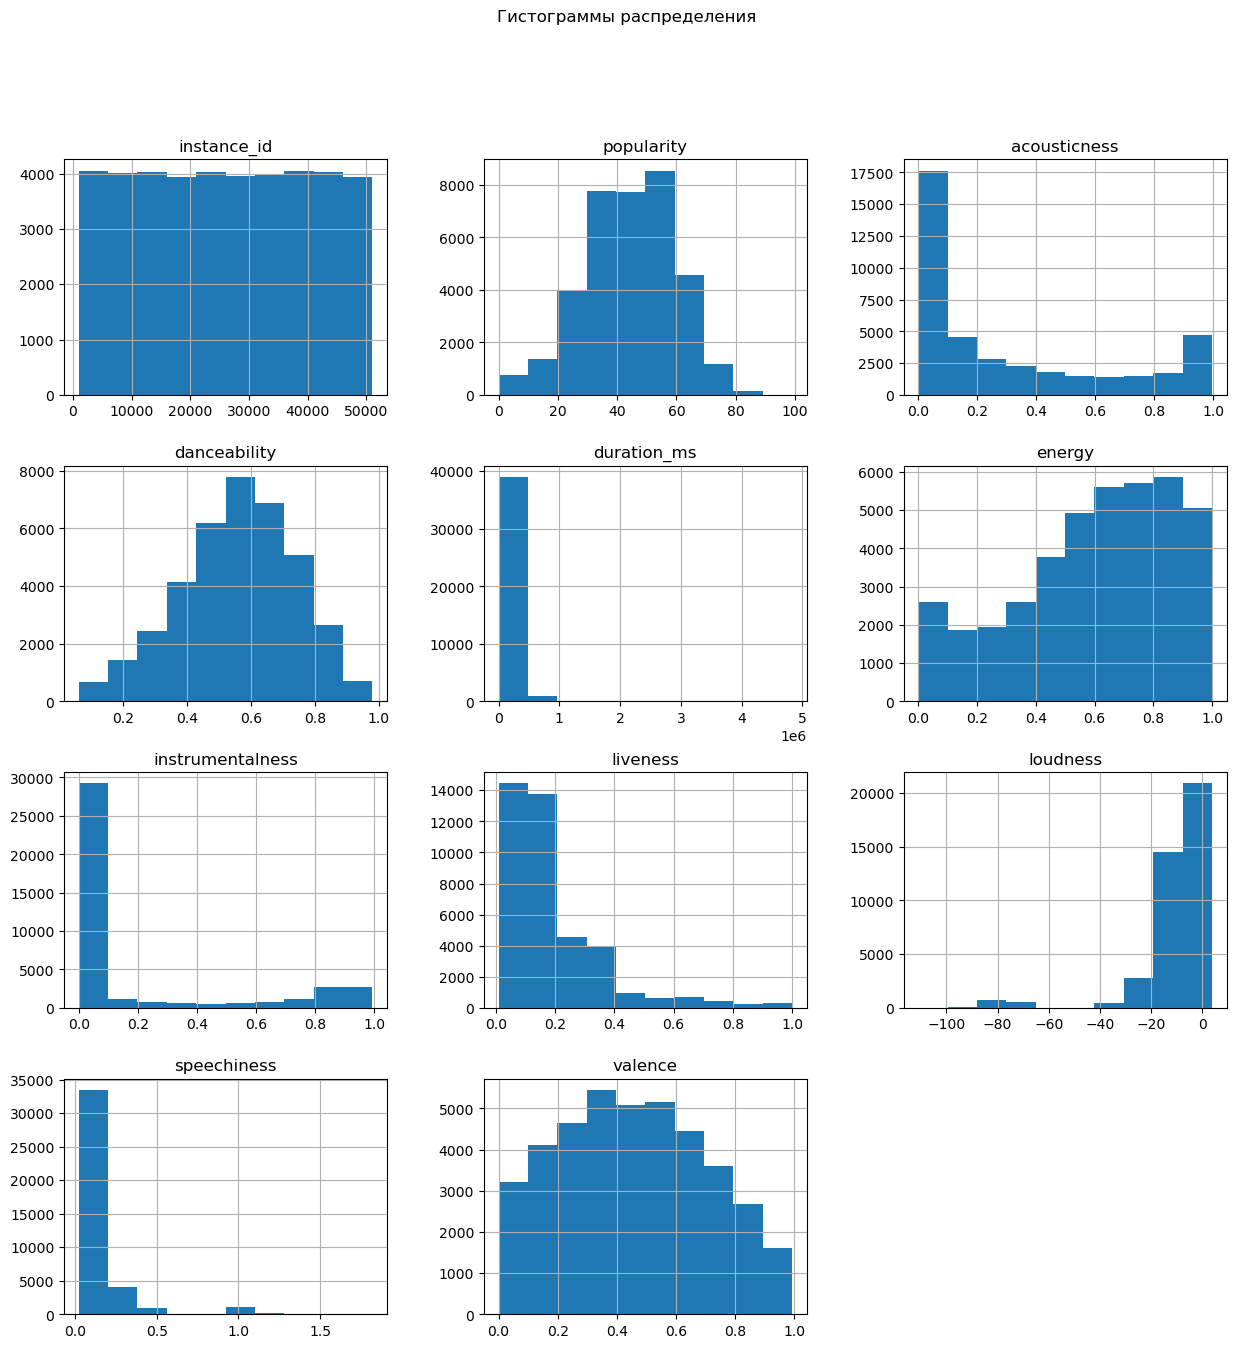


Название датафрейма: тестовый датасет 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       10000 non-null  int64  
 1   track_name        7388 non-null   object 
 2   popularity        8987 non-null   float64
 3   acousticness      10000 non-null  float64
 4   danceability      9477 non-null   float64
 5   duration_ms       10000 non-null  float64
 6   energy            10000 non-null  float64
 7   instrumentalness  10000 non-null  float64
 8   key               9673 non-null   object 
 9   liveness          10000 non-null  float64
 10  loudness          10000 non-null  float64
 11  mode              9518 non-null   object 
 12  speechiness       10000 non-null  float64
 13  tempo             10000 non-null  object 
 14  obtained_date     8419 non-null   object 
 15  valence           10000 non-null  float64
dtype

None

,count,mean,std,min,25%,50%,75%,max
instance_id,10000.0,26161.463800,14394.194559,1008.000000,13839.75000,26174.000000,38503.50000,50993.000
popularity,8987.0,44.389340,15.526772,0.000000,34.00000,45.000000,56.00000,90.000
acousticness,10000.0,0.301737,0.338088,0.000001,0.01930,0.142000,0.54400,0.996
danceability,9477.0,0.558774,0.178436,0.059600,0.44500,0.567000,0.68700,0.986
duration_ms,10000.0,220974.731500,124327.610404,-1.000000,174620.75000,219213.000000,268294.50000,2764934.000
energy,10000.0,0.604948,0.262109,0.000792,0.44300,0.648500,0.81600,0.998
instrumentalness,10000.0,0.177284,0.322037,0.000000,0.00000,0.000144,0.13500,0.996
liveness,10000.0,0.195521,0.162387,0.019100,0.09730,0.127000,0.24900,0.993
loudness,10000.0,-11.540743,14.417862,-102.967000,-11.27975,-7.372500,-5.19675,1.893
speechiness,10000.0,0.130430,0.212070,0.022400,0.03670,0.051300,0.11500,1.649


,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
8019,10232,NaN,31.0,0.0011,0.406,332040.0,0.977,0.005710,F,0.217,-2.700,Minor,0.3520,180.79,4-Apr,0.3740
4822,40742,"It's On Us (Benefiting the ""It's On Us"" Campaign)",57.0,0.0636,0.493,-1.0,0.718,0.000000,A,0.080,-4.634,Major,0.0399,?,4-Apr,0.3280
5391,10678,Calamity of Saints,23.0,0.0067,0.245,312720.0,0.691,0.867000,F,0.115,-8.720,Minor,0.0509,132.036,4-Apr,0.0566
4529,1019,7th Sevens,50.0,0.0281,0.656,307328.0,0.653,0.858000,NaN,0.112,-11.883,Minor,0.0396,117.999,4-Apr,0.1990
5309,36280,NaN,59.0,0.9760,0.363,233000.0,0.135,0.000265,G,0.107,-11.166,Minor,0.0295,98.45,4-Apr,0.1950


Количество дубликатов в данных: 0
Количество столбцов: 16, число записей: 10000


array([[<Axes: title={'center': 'instance_id'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

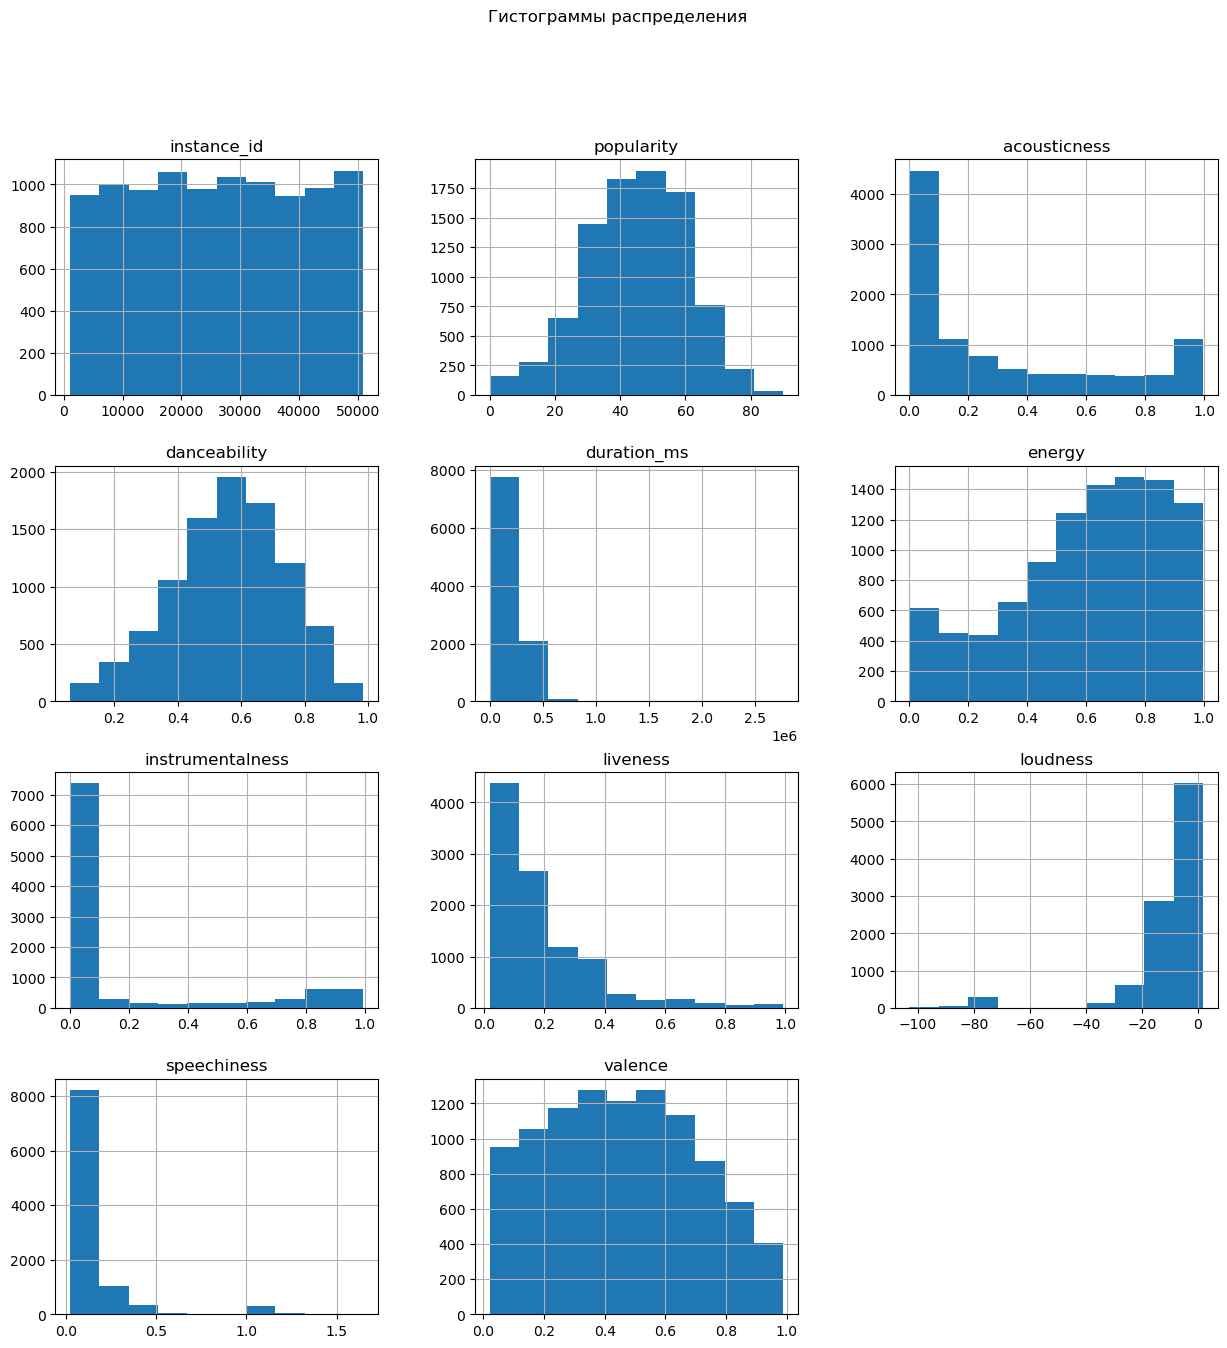

In [151]:
first_look(train)
first_look(test)

In [152]:
train.isna().sum()

instance_id             0
track_name          10738
popularity           3922
acousticness            0
danceability         2037
duration_ms             0
energy                  0
instrumentalness        0
key                  1423
liveness                0
loudness                0
mode                 1853
speechiness             0
tempo                   0
obtained_date        6219
valence                 0
music_genre             0
dtype: int64

In [153]:
test.isna().sum()

instance_id            0
track_name          2612
popularity          1013
acousticness           0
danceability         523
duration_ms            0
energy                 0
instrumentalness       0
key                  327
liveness               0
loudness               0
mode                 482
speechiness            0
tempo                  0
obtained_date       1581
valence                0
dtype: int64

### В данных есть пропуски. Узнаю природу этих пропусков и обработаю, если в этом есть необходимость и целесообразность. А так же, так как есть два датасета: обучающий и тестовый, буду проводитьь соответствующие преобразования одновременно на двух датасетах

In [154]:
train['obtained_date'].unique()

array(['4-Apr', nan, '5-Apr', '3-Apr', '1-Apr', '0/4'], dtype=object)

In [155]:
test['obtained_date'].unique()

array(['4-Apr', '3-Apr', nan, '5-Apr', '1-Apr'], dtype=object)

In [156]:
train['key'].unique()

array(['G#', 'C', nan, 'B', 'G', 'D', 'E', 'C#', 'A', 'F', 'A#', 'F#',
       'D#'], dtype=object)

In [157]:
test['key'].unique()

array(['G', 'A', 'C#', 'D', 'F#', 'F', 'A#', 'C', 'B', 'G#', 'E', 'D#',
       nan], dtype=object)

In [158]:
train['popularity']=train['popularity'].fillna(round(train['popularity'].median(),0))

In [159]:
test['popularity']=test['popularity'].fillna(round(test['popularity'].median(),0))

### Пропуски в популярности были заполнены медианным значением, так как по гистограмме распределения видно что медиана наиболее соответствует значениям которые могли бы быть на месте пропусков 

In [160]:
train['popularity'].isna().sum()

0

In [161]:
test['popularity'].isna().sum()

0

In [162]:
train.duplicated().sum()

0

In [163]:
test.duplicated().sum()

0

In [164]:
train['danceability']=train['danceability'].fillna(round(train['danceability'].median(),0))

In [165]:
train['danceability'].isna().sum()

0

In [166]:
test['danceability']=test['danceability'].fillna(round(test['danceability'].median(),0))

In [167]:
test['danceability'].isna().sum()

0

### Пропуска в танцевальности также были заполнены медианными значениями, имеющими небельшой разброс

In [168]:
columns_to_replace = ['track_name', 'key','obtained_date']
train[columns_to_replace] = train[columns_to_replace].fillna('нет данных')

In [169]:
test[columns_to_replace] = test[columns_to_replace].fillna('нет данных')

In [170]:
train['mode'] = train['mode'].fillna('другое')

In [171]:
test['mode'] = test['mode'].fillna('другое')

In [172]:
train['mode'].unique()

array(['Minor', 'Major', 'другое'], dtype=object)

In [173]:
test['mode'].unique()

array(['Major', 'другое', 'Minor'], dtype=object)

### Оставшиеся пропуски в столбцах были заменены на значения "нет данных". Это было сделано во-первых, так как много пропусков, которые нельзя бесследно удалить, во-вторых, так как их значения не сильно будут влиять на работу модели

In [174]:
train.isna().sum()

instance_id         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64

In [175]:
test.isna().sum()

instance_id         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
dtype: int64

In [176]:
train[train['duration_ms']<0]['duration_ms']

0       -1.0
19      -1.0
25      -1.0
27      -1.0
31      -1.0
        ... 
39963   -1.0
39964   -1.0
39967   -1.0
39975   -1.0
39980   -1.0
Name: duration_ms, Length: 3956, dtype: float64

In [177]:
test[test['duration_ms']<0]['duration_ms']

7      -1.0
16     -1.0
24     -1.0
39     -1.0
44     -1.0
       ... 
9963   -1.0
9969   -1.0
9982   -1.0
9985   -1.0
9992   -1.0
Name: duration_ms, Length: 983, dtype: float64

### Отрицательные значения продолжительности трека никак не повлияют на работу модели. Жанр менее вероятно будет зависеть от продожительности композиции. Принято решение не преобразовывать данные в этом столбце. Их очень много

In [178]:
train['tempo'].unique()

array(['144.922', '126.914', '65.42699999999999', ..., '144.929',
       '106.76', '104.436'], dtype=object)

In [179]:
test['tempo'].unique()

array(['80.91199999999999', '120.10799999999999', '153.464', ...,
       '80.727', '162.997', '101.95299999999999'], dtype=object)

In [180]:
train['tempo'].replace('?', pd.NA, inplace=True)
train['tempo'] = pd.to_numeric(train['tempo'], errors='coerce')

In [181]:
test['tempo'].replace('?', pd.NA, inplace=True)
test['tempo'] = pd.to_numeric(test['tempo'], errors='coerce')

### Найдены аномальные и преобразованы в пропуска значения в столбце "Темп". 

''

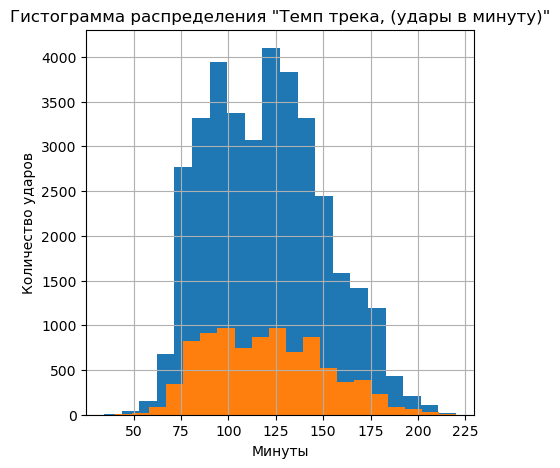

In [182]:
train['tempo'].hist(bins=20, figsize=(5,5))
test['tempo'].hist(bins=20, figsize=(5,5))
plt.title('Гистограмма распределения "Темп трека, (удары в минуту)"')
plt.xlabel('Минуты')
plt.ylabel('Количество ударов')
;

In [183]:
train['tempo'] = train['tempo'].fillna(train['tempo'].median())

In [184]:
test['tempo'] = test['tempo'].fillna(test['tempo'].median())

In [185]:
train['tempo'].isna().sum()

0

In [186]:
test['tempo'].isna().sum()

0

### Заполнили пропуски медианными значениями

In [187]:
columns_to_drop = ['instance_id', 'track_name', 'obtained_date']
train.drop(columns=columns_to_drop, inplace=True)

In [188]:
columns_to_drop_test = ['track_name', 'obtained_date']
test.drop(columns=columns_to_drop_test, inplace=True)

In [189]:
train.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,33.0,0.000718,0.501,-1.0,0.935,0.020100,G#,0.0831,-5.566,Minor,0.1570,144.922,0.1880,Electronic
1,55.0,0.064700,0.282,288333.0,0.738,0.014200,C,0.2900,-5.566,Major,0.0324,126.914,0.2110,Alternative
2,39.0,0.931000,0.364,115240.0,0.349,0.940000,нет данных,0.1100,-13.279,другое,0.0321,65.427,0.0891,Classical
3,56.0,0.012300,0.332,234638.0,0.847,0.000027,B,0.2970,-4.513,Minor,0.0910,67.230,0.3920,Electronic
4,52.0,0.580000,0.716,221640.0,0.614,0.000014,G,0.1600,-7.099,Major,0.0360,88.006,0.6800,Country


In [190]:
test.head()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,20514,49.0,0.7800,0.448,208733.0,0.359,0.671000,G,0.0753,-13.559,Major,0.0288,80.912,0.0773
1,46957,48.0,0.2120,0.651,262547.0,0.655,0.000198,A,0.2060,-9.430,другое,0.1650,120.108,0.2710
2,5488,34.0,0.1630,0.595,270733.0,0.277,0.677000,C#,0.1310,-14.141,Major,0.0391,153.464,0.1450
3,18150,41.0,0.0684,0.466,227467.0,0.912,0.000000,D,0.0892,-3.423,Minor,0.0474,151.977,0.4160
4,20148,47.0,0.0012,0.345,298813.0,0.974,0.000030,D,0.3620,-3.221,Minor,0.0607,175.027,0.5710


In [191]:
train.duplicated().sum()

1

In [192]:
test.duplicated().sum()

0

In [193]:
train['music_genre'].unique()

array(['Electronic', 'Alternative', 'Classical', 'Country', 'Blues',
       'Rap', 'Rock', 'Hip-Hop', 'Jazz', 'Anime'], dtype=object)

In [194]:
encoder =OneHotEncoder(drop='first')
train_encoded= encoder.fit_transform(train[['key', 'mode']])
col_1=encoder.get_feature_names_out(['key', 'mode'])
train_encoded = pd.DataFrame(train_encoded.toarray(), columns=col_1) 
train = pd.concat([train, train_encoded], axis=1)

### Применил кодирование качественных признаком для корректной работы моделей

In [195]:
train.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_нет данных,mode_Minor,mode_другое
0,33.0,0.000718,0.501,-1.0,0.935,0.020100,G#,0.0831,-5.566,Minor,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,55.0,0.064700,0.282,288333.0,0.738,0.014200,C,0.2900,-5.566,Major,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39.0,0.931000,0.364,115240.0,0.349,0.940000,нет данных,0.1100,-13.279,другое,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,56.0,0.012300,0.332,234638.0,0.847,0.000027,B,0.2970,-4.513,Minor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,52.0,0.580000,0.716,221640.0,0.614,0.000014,G,0.1600,-7.099,Major,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [196]:
encoder =OneHotEncoder(drop='first')
test_encoded= encoder.fit_transform(test[['key', 'mode']])
col_2=encoder.get_feature_names_out(['key', 'mode'])
test_encoded = pd.DataFrame(test_encoded.toarray(), columns=col_2) 
test = pd.concat([test, test_encoded], axis=1)

In [197]:
test.head()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_нет данных,mode_Minor,mode_другое
0,20514,49.0,0.7800,0.448,208733.0,0.359,0.671000,G,0.0753,-13.559,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,46957,48.0,0.2120,0.651,262547.0,0.655,0.000198,A,0.2060,-9.430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5488,34.0,0.1630,0.595,270733.0,0.277,0.677000,C#,0.1310,-14.141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18150,41.0,0.0684,0.466,227467.0,0.912,0.000000,D,0.0892,-3.423,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20148,47.0,0.0012,0.345,298813.0,0.974,0.000030,D,0.3620,-3.221,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [198]:
data_train, data_valid = train_test_split(train, test_size=0.25, random_state=12345)
data_test, data_valid = train_test_split(train, test_size=0.25, random_state=12345)

In [199]:
print('Отношение размера обучающей выборки к валидационной', data_train.shape[0]/data_valid.shape[0])

Отношение размера обучающей выборки к валидационной 3.0


In [200]:
target_train = data_train['music_genre']
features_train = data_train.drop(['duration_ms', 'key', 'music_genre', 'mode'], axis=1)
target_valid = data_valid['music_genre']
features_valid = data_valid.drop(['duration_ms', 'key', 'music_genre', 'mode'], axis=1)


In [201]:
features_test = test.drop(['instance_id', 'duration_ms', 'key', 'mode'], axis=1)

In [202]:
features_train.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_нет данных,mode_Minor,mode_другое
12582,37.0,0.1430,0.731,0.200,0.890,0.1200,-15.669,0.0659,145.883,0.455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17844,58.0,0.0819,0.673,0.628,0.000,0.0812,-5.192,0.0683,90.107,0.708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28978,18.0,0.9650,0.722,0.173,0.909,0.1060,-22.556,0.0476,125.083,0.436,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17505,45.0,0.2040,0.733,0.558,0.000,0.6950,-5.560,0.2780,84.577,0.566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13584,42.0,0.3040,0.211,0.455,0.000,0.0667,-7.771,0.0343,139.305,0.121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
features_test.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_нет данных,mode_Minor,mode_другое
0,49.0,0.7800,0.448,0.359,0.671000,0.0753,-13.559,0.0288,80.912,0.0773,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,48.0,0.2120,0.651,0.655,0.000198,0.2060,-9.430,0.1650,120.108,0.2710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,34.0,0.1630,0.595,0.277,0.677000,0.1310,-14.141,0.0391,153.464,0.1450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,41.0,0.0684,0.466,0.912,0.000000,0.0892,-3.423,0.0474,151.977,0.4160,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,47.0,0.0012,0.345,0.974,0.000030,0.3620,-3.221,0.0607,175.027,0.5710,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [204]:
best_model_1 = None
best_result_1 = 0
best_f1 = 0

for depth in range(1,10):
    for leaf in range(1,10):
        model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf)
        model_1.fit(features_train, target_train)
        train_predictions_1 = model_1.predict(features_valid)
        result_1 = model_1.score(features_valid, target_valid)
        result_f1 = f1_score(target_valid, train_predictions_1, average='weighted')
        if result_f1 > best_f1:
            best_model_1 = model_1
            best_result_1 = result_1
            best_f1 = result_f1
            max_depth = depth
            min_sample_leaf = leaf
model_1_scores = cross_val_score(best_model_1, features_train, target_train, cv=5, scoring='accuracy')
print('Максимальная глубина дерева:', max_depth)
print('Минимальное количество обьектов в листе:', min_sample_leaf)
print("Accuracy наилучшей модели на валидационной выборке:", round(best_result_1,4))
print('F1 этой модели:', round(best_f1, 4))
print('Точность по кросс-валидации на модели решающего дерева:', round(model_1_scores.mean(),4))

Максимальная глубина дерева: 8
Минимальное количество обьектов в листе: 2
Accuracy наилучшей модели на валидационной выборке: 0.4842
F1 этой модели: 0.486
Точность по кросс-валидации на модели решающего дерева: 0.4868


In [205]:
best_model_2 = None
best_result_2 = 0
best_f2 = 0
for est in range(10,151,10):
    for depth in range(1, 16):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_2.fit(features_train, target_train)
        train_predictions_2 = model_2.predict(features_valid)
        result_2 = model_2.score(features_valid, target_valid)
        result_f2 = f1_score(target_valid, train_predictions_2, average='weighted')
        if result_f2 > best_f2:
            best_model_2 = model_2
            best_result_2 = result_2
            best_f2 = result_f2
            n_estimators = est
            max_depth = depth
model_2_scores = cross_val_score(best_model_2, features_train, target_train, cv=5, scoring='accuracy')
print('est:', n_estimators)
print('depth:', max_depth)
print('Accuracy наилучшей модели на валидационной выборке:', round(best_result_2,4))
print('F1 этой модели:', round(best_f2, 4))
print('Точность по кросс-валидации на модели случайного леса:', round(model_2_scores.mean(),4))

est: 70
depth: 15
Accuracy наилучшей модели на валидационной выборке: 0.5407
F1 этой модели: 0.539
Точность по кросс-валидации на модели случайного леса: 0.536


In [206]:
model_3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=5000)
model_3.fit(features_train, target_train)
train_predictions_3 = model_3.predict(features_valid)
result_3 = accuracy_score(target_valid, train_predictions_3)
#dump(model_3, 'model_9_1.joblib')
model_3_scores = cross_val_score(model_3, features_train, target_train, cv=5, scoring='accuracy')

print('Accuracy')
print('Валидационная выборка:', round(result_3,4))
print('F1 этой модели:', round(f1_score(target_valid, train_predictions_3, average='weighted'), 4))
print('Точность по кросс-валидации на модели логистической регрессии:', round(model_3_scores.mean(),4))

Accuracy
Валидационная выборка: 0.4727
F1 этой модели: 0.4693
Точность по кросс-валидации на модели логистической регрессии: 0.4695


### Были разработаны 3 модели: случайного леса, дерева решений и логистической регресии с плавающими параметрами. Наибельшую эффективность показала модель случайного леса с гиперпараметрами: est=70, depth=15. Значение точности предсказаний полученой модели 0.5407

In [207]:
features_test = features_test[features_train.columns]

In [208]:
test['music_genre'] = best_model_2.predict(features_test)

In [209]:
test.head(10)

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_нет данных,mode_Minor,mode_другое,music_genre
0,20514,49.0,0.7800,0.448,208733.0,0.359,0.671000,G,0.0753,-13.559,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Jazz
1,46957,48.0,0.2120,0.651,262547.0,0.655,0.000198,A,0.2060,-9.430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Hip-Hop
2,5488,34.0,0.1630,0.595,270733.0,0.277,0.677000,C#,0.1310,-14.141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Electronic
3,18150,41.0,0.0684,0.466,227467.0,0.912,0.000000,D,0.0892,-3.423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Country
4,20148,47.0,0.0012,0.345,298813.0,0.974,0.000030,D,0.3620,-3.221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Alternative
5,35663,25.0,0.0764,0.557,231107.0,0.432,0.000006,D,0.1140,-77.467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Blues
6,27890,49.0,0.2690,0.694,298600.0,0.895,0.000004,A,0.4000,-3.258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Hip-Hop
7,18166,45.0,0.1980,1.000,-1.0,0.597,0.000744,F#,0.1980,-7.619,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Hip-Hop
8,19306,39.0,0.3730,0.487,184067.0,0.331,0.000000,F#,0.2470,-14.201,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Country
9,4534,48.0,0.8590,0.633,231040.0,0.392,0.930000,F,0.0817,-12.604,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Jazz


In [210]:
test[test['music_genre']=='Alternative'].shape[0]/test.shape[0]

0.0709

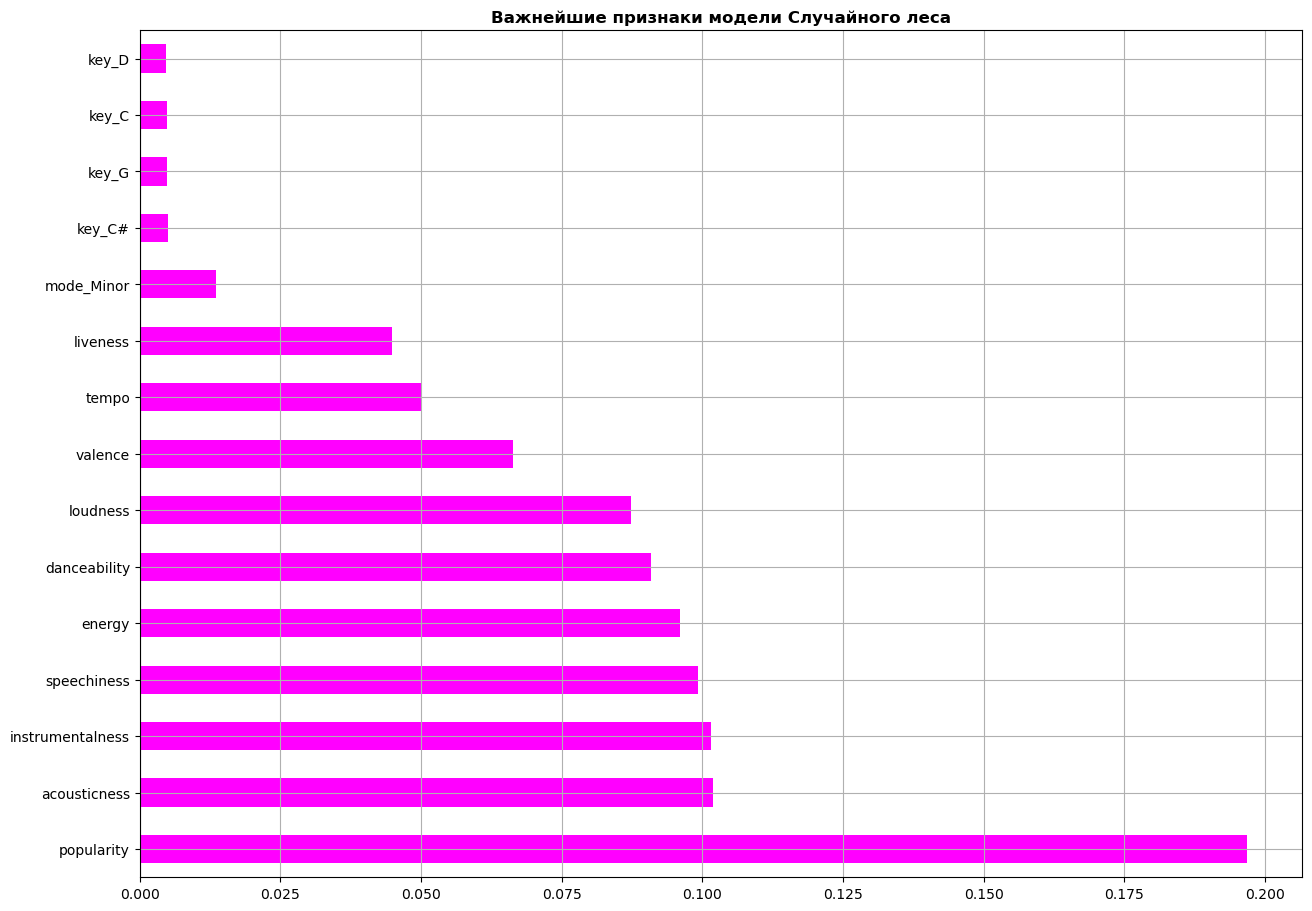

In [211]:
feature_importance = model_2.feature_importances_
pd.Series(feature_importance, features_test.columns).nlargest(15).plot(kind='barh', figsize=(15,11), grid=True, color='magenta')

plt.title('Важнейшие признаки модели Случайного леса', weight = 'bold')
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


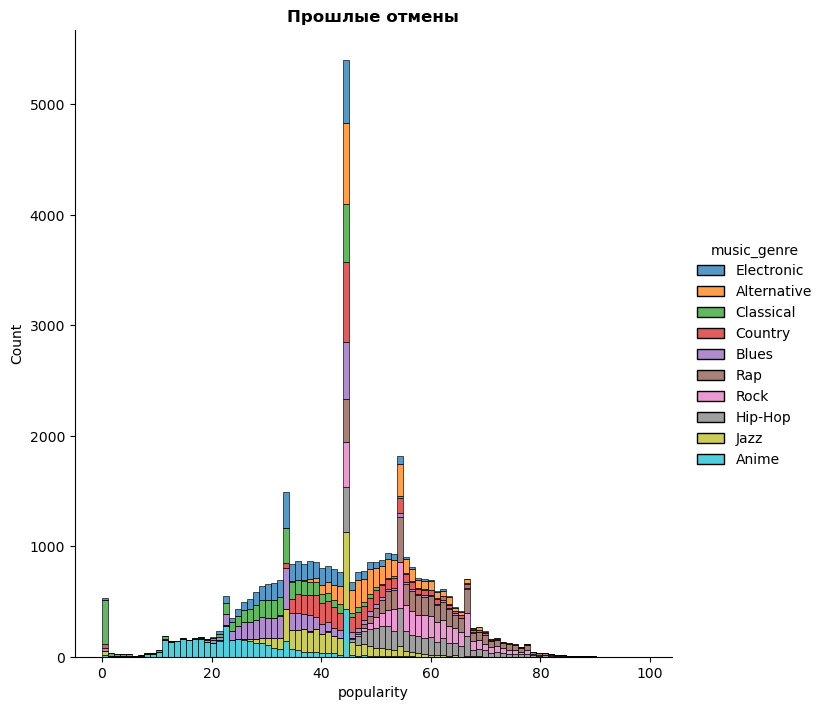

In [212]:
sns.displot(train, x='popularity', hue='music_genre', kind='hist', multiple='stack', height=7)
plt.title('Прошлые отмены', weight = 'bold')
plt.show()

In [213]:
sample.head()

,instance_id,music_genre
0,20514,Alternative
1,46957,Electronic
2,5488,Classical
3,18150,Classical
4,20148,Classical


In [214]:
true_genre = sample['music_genre']
predicted_genre = test['music_genre']

accuracy = accuracy_score(true_genre, predicted_genre)
print(f'Accuracy на тестовой выборке: {accuracy:.4f}')

f1 = f1_score(true_genre, predicted_genre, average='weighted')
print(f'F1 на тестовой выборке: {f1:.4f}')

conf_matrix = confusion_matrix(true_genre, predicted_genre)
print('Матрица ошибок:')
print(conf_matrix)

Accuracy на тестовой выборке: 0.0981
F1 на тестовой выборке: 0.0979
Матрица ошибок:
[[ 86  76 100 105 108 111 127 112 104 132]
 [ 77  90  88  92 131  97 107  95  90 130]
 [ 80 106  69 112 111  97 106  96  91 145]
 [ 63  75  67 105 105  87 134  98 108 139]
 [ 67  92  84  92  94  87 116 109  98 137]
 [ 61  93  77  88 103  94 109  85 102 137]
 [ 65  92  97  88 135 105 125 120 110 128]
 [ 77  91  78 104 103  91 102 105 101 125]
 [ 72  96  87 109 110 101 116 102 105 138]
 [ 61  83  87  97  96 101 121  98  93 108]]


In [217]:
result = test[['instance_id', 'music_genre']]
result

,instance_id,music_genre
0,20514,Jazz
1,46957,Hip-Hop
2,5488,Electronic
3,18150,Country
4,20148,Alternative
...,...,...
9995,9701,Anime
9996,3198,Jazz
9997,12437,Rock
9998,28885,Alternative


In [219]:
result.to_csv('pred_test_new.csv', index=False)

## В свете проведенного анализа моей модели на тестовой выборке, можно сделать следующие выводы:

Точность и F1-мера:

Мои результаты показывают низкую точность и F1-меру, составляющие всего лишь около 9.81% и 9.79% соответственно. Эти значения говорят о том, что модель пока не обладает достаточной способностью точно классифицировать музыкальные жанры.
Матрица ошибок:

Матрица ошибок предоставляет более детальное представление о том, как модель ошибается в предсказаниях для каждого из десяти классов. На основе этой матрицы можно выделить те классы, в которых модель показывает наибольшие затруднения.
Дальнейшие шаги:

Рекомендуется провести дополнительный анализ и настройку параметров модели, возможно, использовать более сложные алгоритмы классификации или улучшить предобработку данных для достижения лучших результатов.
Эти выводы могут служить отправной точкой для определения следующих шагов по улучшению модели и повышению ее производительности. Если у вас есть конкретные вопросы или вы хотите обсудить дополнительные детали, буду рад помочь.